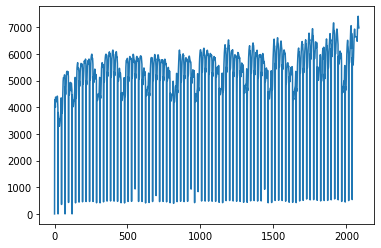

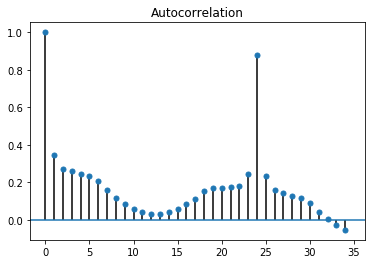

P-value is 4.407545793682939e-09
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 2085
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -17913.920
Method:                       css-mle   S.D. of innovations           1302.817
Date:                Tue, 31 Mar 2020   AIC                          35841.840
Time:                        22:39:49   BIC                          35881.338
Sample:                             2   HQIC                         35856.312
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3794      4.942     -0.077      0.939     -10.066       9.307
ar.L1.D2.y    -1.3499      0.021    -64.448      0.000      -1.391      -1.309
ar.L2.D2.y    -1.34

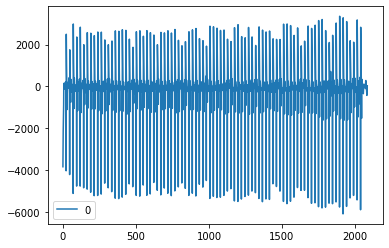

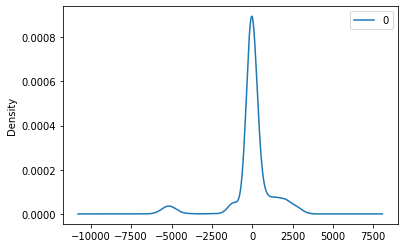

                 0
count  2085.000000
mean     -4.208048
std    1306.012061
min   -6078.863401
25%    -144.134908
50%     -28.523814
75%     239.736440
max    3349.411474


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras import regularizers
from keras.constraints import maxnorm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA, ARIMA


# The models were done by hour using all the days of the week
data = pd.read_excel("C:/Users/ERIC/Desktop/PML-06MTP-115/06MTP 01012020.xlsm",squeeze=True, sheet_name = 0)

demand = data.iloc[:,4].values

# Plot all the data
plt.figure()
plt.plot(demand)
plt.show()
# Plot autocorrelation function
plot_acf(demand, alpha =1 )
plt.show()
#Dickey fuller test
results = adfuller(demand)
print("P-value is", results[1])
# fit model
model = ARIMA(demand, order=(5,2,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
# there may still be some trend information not captured by the model.
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# the errors are Gaussian
residuals.plot(kind='kde')
plt.show()
# The distribution of the residual errors is displayed. 
# The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).
print(residuals.describe())

predicted=6959.490672, expected=6870.830000
predicted=7072.903910, expected=6929.000000
predicted=7116.780646, expected=6922.000000
predicted=7109.094920, expected=6826.670000
predicted=7018.927100, expected=6674.080000
predicted=6835.810255, expected=6639.920000
predicted=6681.697494, expected=6638.000000
predicted=6575.306590, expected=6638.000000
predicted=6528.122466, expected=6638.000000
predicted=6532.114881, expected=6638.000000
predicted=6575.842084, expected=6638.000000
predicted=6625.033415, expected=6638.000000
predicted=6635.440218, expected=6638.000000
predicted=6636.027183, expected=6638.000000
predicted=6636.002424, expected=6638.000000
predicted=6636.020864, expected=6638.000000
predicted=6636.014947, expected=6638.000000
predicted=6636.004582, expected=6638.000000
predicted=6635.997572, expected=6534.670000
predicted=6568.813737, expected=6473.830000
predicted=6492.151793, expected=6738.420000
predicted=6616.902770, expected=6901.500000
predicted=6789.879421, expected=

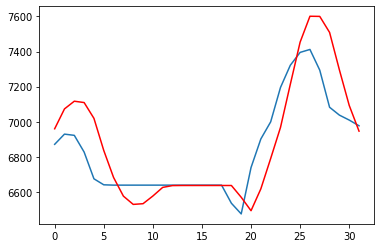

,Pred
0,6959.490672
1,7072.903910
2,7116.780646
3,7109.094920
4,7018.927100
5,6835.810255
6,6681.697494
7,6575.306590
8,6528.122466
9,6532.114881


In [14]:
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [15]:
model = ARIMA(demand, order=(5,2,0))
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand[0])
forecast_demand.columns = ['Demand Predicted']
forecast_demand

,Demand Predicted
0,6850.357892
1,6746.707540
2,6679.209394
3,6630.176128
4,6548.206537
5,6456.581625
6,6367.776788
7,6297.890510
8,6224.631429
9,6141.926173
